<a href="https://colab.research.google.com/github/najjouj/machine-learning/blob/main/_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The competition is use machine learning to create a model that predicts which passengers survived the Titanic ship

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1- Explore Data

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nu=train.isnull().sum()

In [ ]:
nu[nu>0]

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

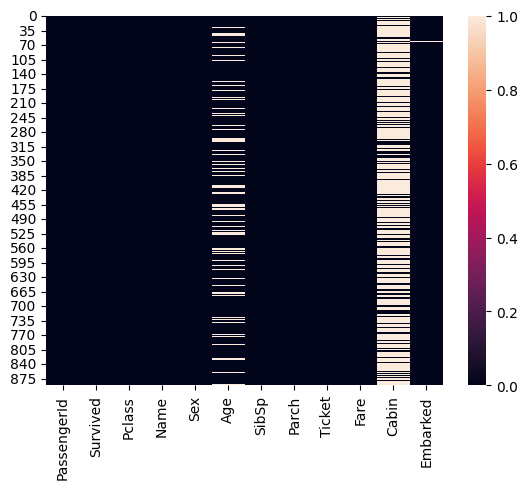

In [ ]:
sns.heatmap(train.isnull())

## 2- Clean Data

In [ ]:
train.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
train.Age=train.Age.fillna(train.Age.median())
train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<Axes: >

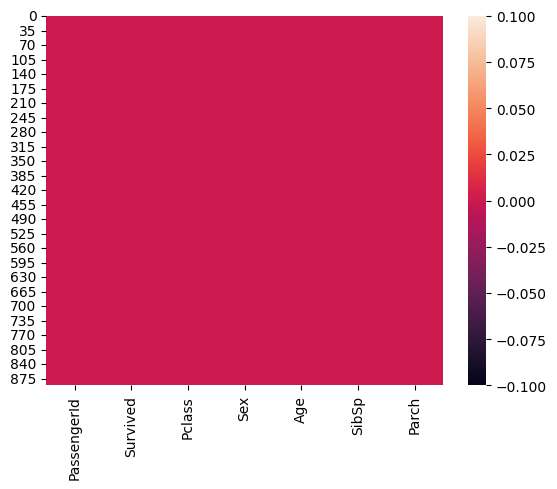

In [ ]:
sns.heatmap(train.isnull())

## Data Analysis

In [ ]:
train_01=train.drop('Sex',axis=1)
co=train_01.corr()
#corrolation
co

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000


<Axes: >

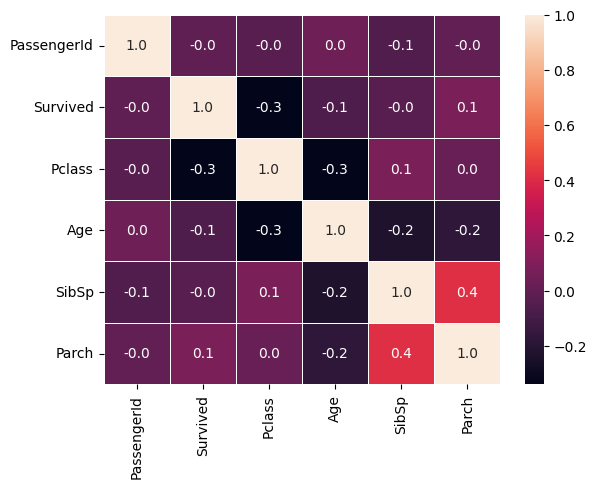

In [ ]:
sns.heatmap(co,annot=True,fmt='.1f',linewidth=.5)

In [ ]:
train.Survived.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
train.Sex.value_counts()

,count
Sex,
male,577
female,314


<Axes: ylabel='count'>

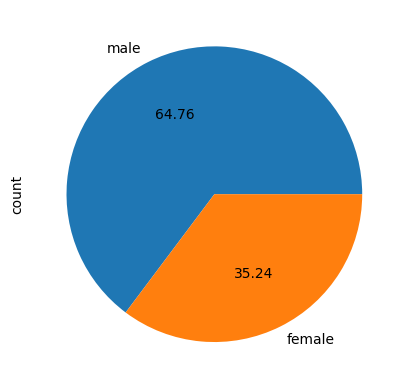

In [ ]:
train.Sex.value_counts().plot.pie(autopct='%0.2f')

<Axes: xlabel='Sex', ylabel='count'>

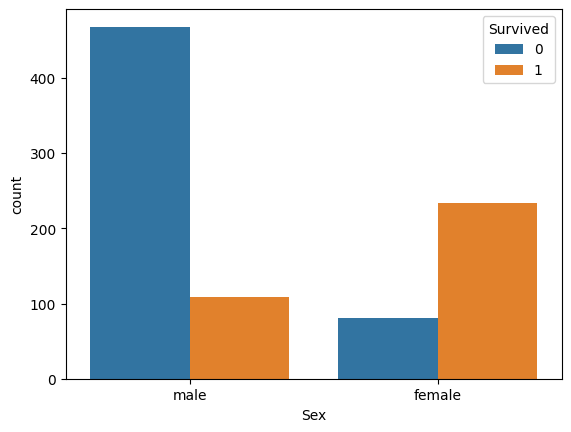

In [ ]:
sns.countplot(data=train,x=train.Sex,hue=train.Survived,)

<Axes: xlabel='Pclass', ylabel='count'>

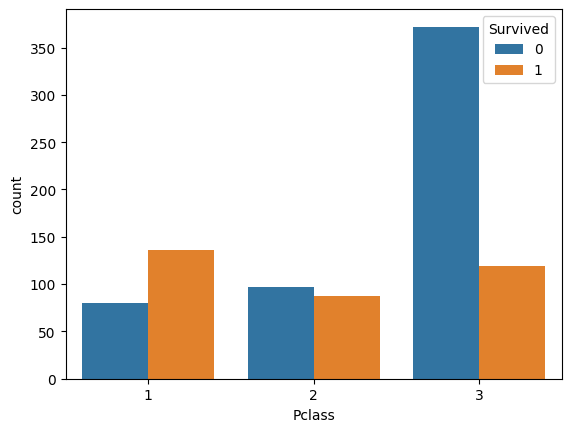

In [ ]:
sns.countplot(data=train,x=train.Pclass,hue=train.Survived,)

<Axes: xlabel='Age', ylabel='Count'>

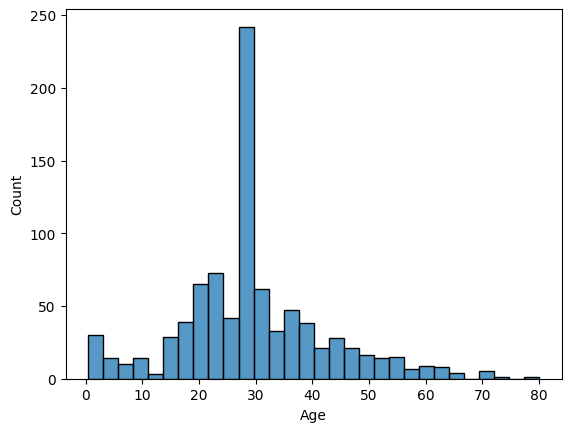

In [ ]:
sns.histplot(train.Age)

## 4- Transform Data

In [ ]:
train=train.replace(['male','female'],[0,1])

/tmp/ipython-input-543722389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train=train.replace(['male','female'],[0,1])


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [ ]:
test=test.replace(['male','female'],[0,1])

/tmp/ipython-input-4227994379.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test=test.replace(['male','female'],[0,1])


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


## 5- Create Model

In [ ]:
y=train.Survived
x=train.drop(['Survived'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [ ]:
accuracies=[]

In [ ]:
def all(model):
  model.fit(x_train,y_train)
  pre=model.predict(x_test)
  accuracy=accuracy_score(pre,y_test)
  print('Accuracy=',accuracy)
  accuracies.append(accuracy)



In [ ]:
model1=LogisticRegression()
all(model1)
model2=RandomForestClassifier()
all(model2)
model3=GradientBoostingClassifier()
all(model3)
model4=DecisionTreeClassifier()
all(model4)
model5=KNeighborsClassifier()
all(model5)
model6=GaussianNB()
all(model6)
model7=SVC()
all(model7)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy= 0.7821229050279329
Accuracy= 0.7932960893854749
Accuracy= 0.7653631284916201
Accuracy= 0.7653631284916201
Accuracy= 0.5251396648044693
Accuracy= 0.776536312849162
Accuracy= 0.6201117318435754


In [ ]:
algorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [ ]:
algoAccuRes=pd.DataFrame({'Algorithms':algorithms,'Accuracy':accuracies})

In [ ]:
algoAccuRes.sort_values('Accuracy',ascending=True)

,Algorithms,Accuracy
4,KNeighborsClassifier,0.541899
6,SVC,0.625698
3,DecisionTreeClassifier,0.737430
5,GaussianNB,0.754190
1,RandomForestClassifier,0.787709
2,GradientBoostingClassifier,0.787709
0,LogisticRegression,0.804469


In [ ]:
modelx=LogisticRegression()
modelx.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#lpre=modelx.predict(test)
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
407,408,2,0,3.0,1,1
873,874,3,0,47.0,0,0
740,741,1,0,28.0,0,0
424,425,3,0,18.0,1,1
620,621,3,0,27.0,1,0


In [ ]:
test.drop(['Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
test.Age=train.Age.fillna(train.Age.median())
test.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,22.0,0,0
1,893,3,1,38.0,1,0
2,894,2,0,26.0,0,0
3,895,3,0,35.0,0,0
4,896,3,1,35.0,1,1
...,...,...,...,...,...,...
413,1305,3,0,28.0,0,0
414,1306,1,1,44.0,0,0
415,1307,3,0,28.0,0,0
416,1308,3,0,34.0,0,0


In [ ]:
test.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0


In [ ]:
lpre=modelx.predict(test)

In [ ]:
final=test.PassengerId

In [ ]:
ndf=pd.DataFrame({'PassengerId':final,'Survived':lpre})

In [ ]:
ndf.to_csv('submission.csv',index=False)